# Practice notebook for univariate analysis using NHANES data



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [2]:
da['DMDMARTL'].value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [3]:
da['DMDMARTL'].isnull().sum()

261

In [4]:
da['DMDMARTL_txt_val'] = da['DMDMARTL'].replace({1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated',
                                                  5: 'Never Married', 6: 'Living With Partner', 
                                                  77: 'Refused', 99: "Don't Know"})
da['DMDMARTL_txt_val'].head()

0                Married
1               Divorced
2                Married
3    Living With Partner
4               Divorced
Name: DMDMARTL_txt_val, dtype: object

In [5]:
da['DMDMARTL_txt_val'].value_counts()

Married                2780
Never Married          1004
Divorced                579
Living With Partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTL_txt_val, dtype: int64

In [6]:
da['DMDMARTL_txt_val'].fillna('Missing', inplace=True)
da['DMDMARTL_txt_val'].isna().sum()

0

In [7]:
da['RIAGENDR'].value_counts()

2    2976
1    2759
Name: RIAGENDR, dtype: int64

In [8]:
da['RIAGENDR_val'] = da['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
da['RIAGENDR_val'].value_counts()

Female    2976
Male      2759
Name: RIAGENDR_val, dtype: int64

<AxesSubplot:xlabel='count', ylabel='DMDMARTL_txt_val'>

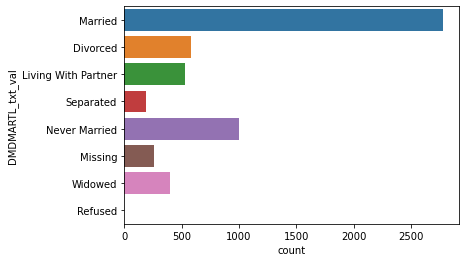

In [9]:
sns.countplot(y=da['DMDMARTL_txt_val'])

<AxesSubplot:xlabel='count', ylabel='RIAGENDR_val'>

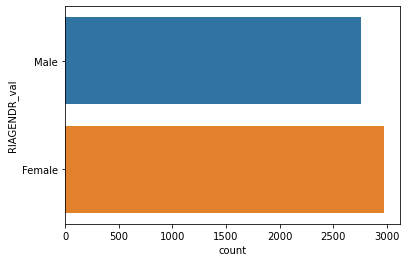

In [10]:
sns.countplot(y=da['RIAGENDR_val'])

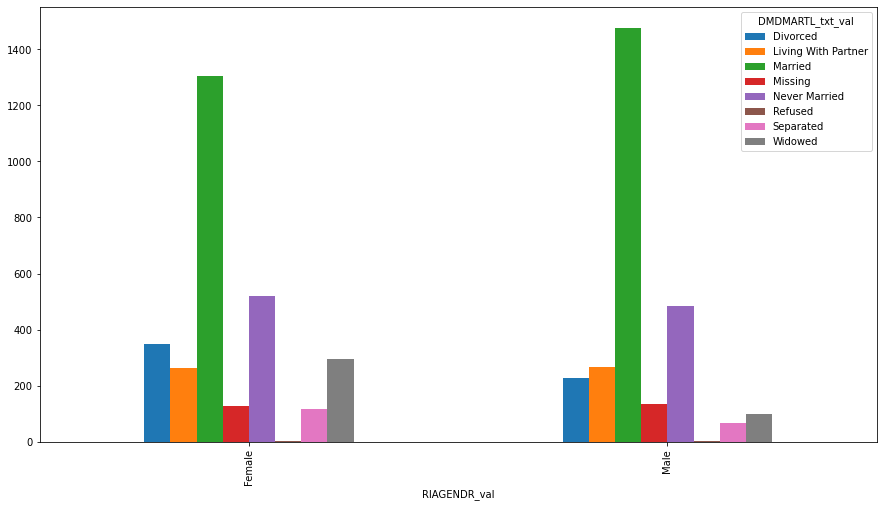

In [11]:
da.groupby(['RIAGENDR_val','DMDMARTL_txt_val']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

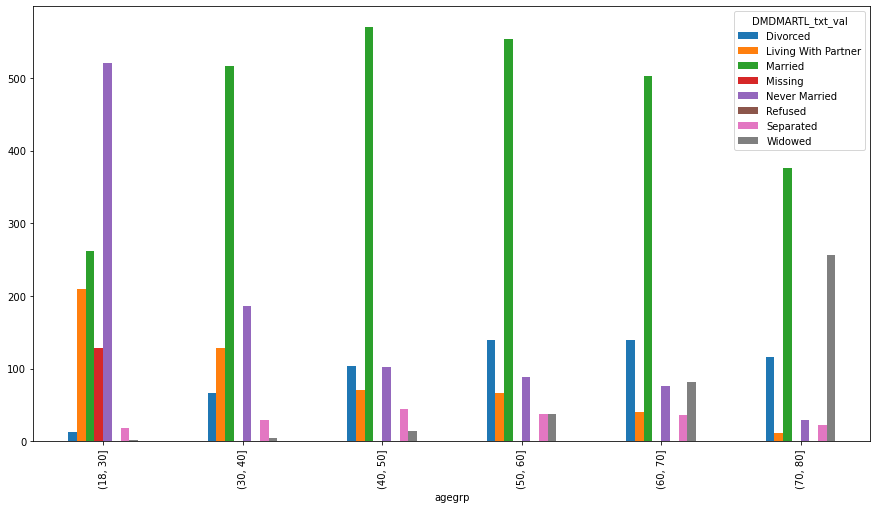

In [12]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

da.groupby(['agegrp', 'DMDMARTL_txt_val']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [13]:
dx = da.loc[~da['DMDMARTL_txt_val'].isin(["Don't Know", 'Missing']), :]
dx = dx.groupby(['agegrp', 'RIAGENDR_val'])['DMDMARTL_txt_val']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis = 1)
print(dx.to_string(float_format= "%3f"))

DMDMARTL_txt_val       Divorced  Living With Partner  Married  Never Married  Refused  Separated  Widowed
agegrp   RIAGENDR_val                                                                                    
(18, 30] Female        0.019892             0.206148 0.285714       0.468354      NaN   0.019892      NaN
         Male          0.004237             0.201271 0.220339       0.555085      NaN   0.014831 0.004237
(30, 40] Female        0.090717             0.120253 0.544304       0.204641      NaN   0.035865 0.004219
         Male          0.052402             0.157205 0.563319       0.194323 0.002183   0.026201 0.004367
(40, 50] Female        0.137450             0.073705 0.573705       0.125498      NaN   0.065737 0.023904
         Male          0.084788             0.082294 0.703242       0.097257      NaN   0.027431 0.004988
(50, 60] Female        0.176596             0.068085 0.546809       0.089362 0.002128   0.057447 0.059574
         Male          0.125551             0.

In [14]:
female_df = pd.DataFrame()
female_df = da[da['RIAGENDR_val'] == 'Female']

C:\Users\RDTL\AppData\Local\Temp\ipykernel_25096\431940014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df["agegrp"] = pd.cut(female_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])


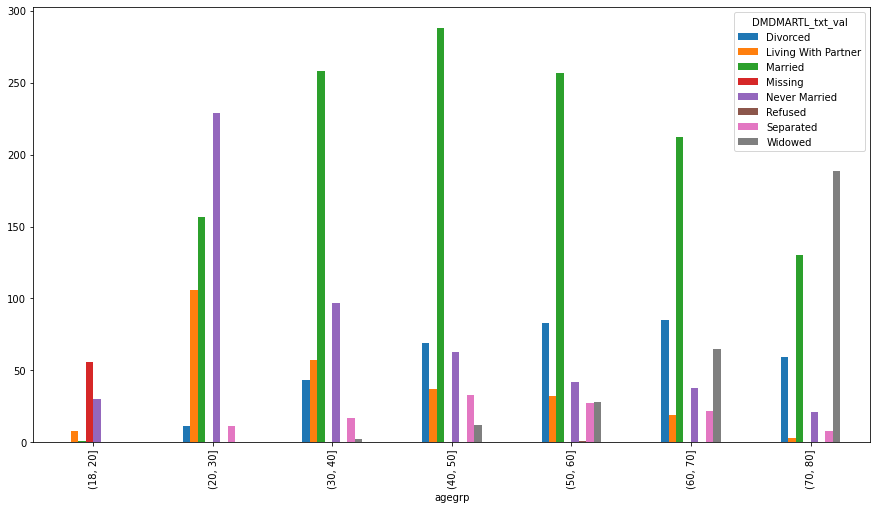

In [15]:
female_df["agegrp"] = pd.cut(female_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])

female_df.groupby(['agegrp', 'DMDMARTL_txt_val']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [16]:
male_df = pd.DataFrame()
male_df = da[da['RIAGENDR_val'] == 'Male']

C:\Users\RDTL\AppData\Local\Temp\ipykernel_25096\2921358986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df["agegrp"] = pd.cut(male_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])


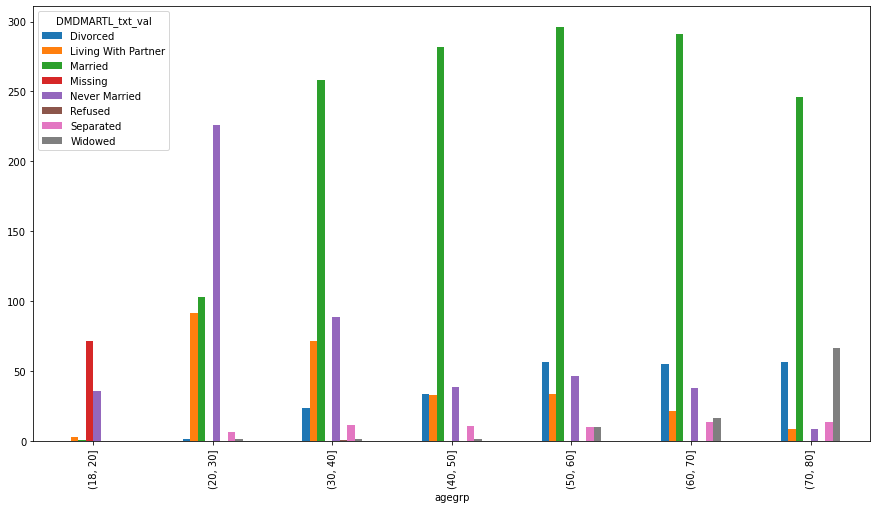

In [17]:
male_df["agegrp"] = pd.cut(male_df.RIDAGEYR, [18, 20, 30, 40, 50, 60, 70, 80])

male_df.groupby(['agegrp', 'DMDMARTL_txt_val']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

We notice that both graphs are unimodal with most men and women being married. The number of observation of Male members is more than the Female members. One thing we see is when looking at the Divorced and Living with Partner sections, There are more Divorced women than those who Live with their partners. It is the other way round for men.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

in the overall distribution of women, we notice that more women are divorced as compared to those who live with their partners. On the other hand, in the 30-40 age group, more of them tend to live with their partners and less of them are divorced. We also notice that in the 30-40 age group, more of them are separated than widowed. This may be because their partners are still relatively younger.

__Q1c.__ Repeat part b for the men.

In the overall case, more men tend to live with their partners than they are divorced. Very few of them are separated or widowed, maybe because women tend to live longer than men.
In the 30-40 age bracket, we notice that the gap between men being separated and widowed is relatively larger than the overall case of all men. Also, the number of men living with their partners is almost three times the number of men divorced, which is interesting as in the overall case, these numbers aren't very far apart.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

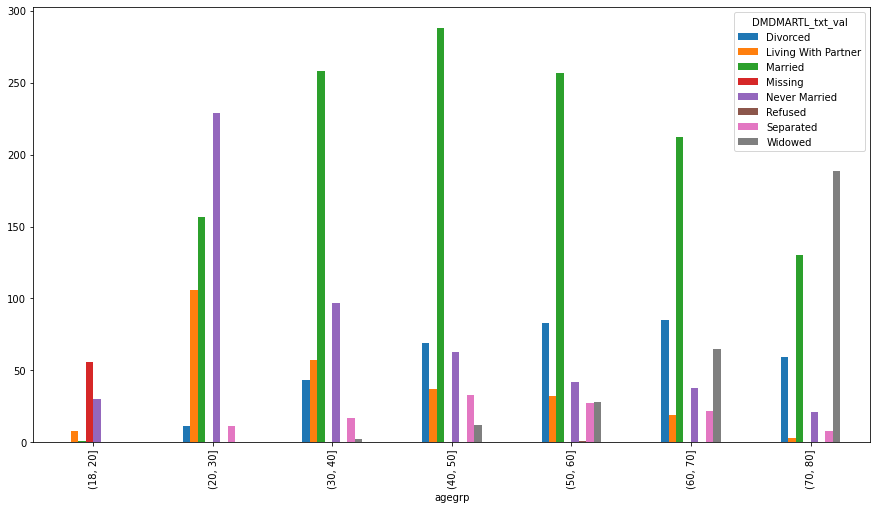

In [18]:
female_df.groupby(['agegrp', 'DMDMARTL_txt_val']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [19]:
female_dx = female_df.loc[~female_df['DMDMARTL_txt_val'].isin(["Don't Know", 'Missing']), :]
female_dx = female_dx.groupby(['agegrp'])['DMDMARTL_txt_val']
female_dx = female_dx.value_counts()
female_dx = female_dx.unstack()
female_dx = female_dx.apply(lambda x: x/x.sum(), axis = 1)
print(female_dx.to_string(float_format= "%3f"))

DMDMARTL_txt_val  Divorced  Living With Partner  Married  Never Married  Refused  Separated  Widowed
agegrp                                                                                              
(18, 20]               NaN             0.205128 0.025641       0.769231      NaN        NaN      NaN
(20, 30]          0.021401             0.206226 0.305447       0.445525      NaN   0.021401      NaN
(30, 40]          0.090717             0.120253 0.544304       0.204641      NaN   0.035865 0.004219
(40, 50]          0.137450             0.073705 0.573705       0.125498      NaN   0.065737 0.023904
(50, 60]          0.176596             0.068085 0.546809       0.089362 0.002128   0.057447 0.059574
(60, 70]          0.192744             0.043084 0.480726       0.086168      NaN   0.049887 0.147392
(70, 80]          0.143902             0.007317 0.317073       0.051220      NaN   0.019512 0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

We see that as age increases, the number of females who get divorced increases up to the age of 70 and then at the age group of 70-80, comparatively less number of people get divorced. We also notice that as age increases, the number of widows increases as well. 
One interesting pattern we notice is that the number of people living with their partners increases from 18-30 but then it steadily decreases with the lowest being at the age og 70-80. This may be because of them being widowed and divorced as well.
Another trend is that as age increases, the people start to get married. it's almost 76% for people between 18-20 but it decreases rapidly.

__Q2b.__ Repeat the construction for males.

In [20]:
male_dx = male_df.loc[~male_df['DMDMARTL_txt_val'].isin(["Don't Know", 'Missing']), :]
male_dx = male_dx.groupby(['agegrp'])['DMDMARTL_txt_val']
male_dx = male_dx.value_counts()
male_dx = male_dx.unstack()
male_dx = male_dx.apply(lambda x: x/x.sum(), axis = 1)
print(male_dx.to_string(float_format= "%3f"))

DMDMARTL_txt_val  Divorced  Living With Partner  Married  Never Married  Refused  Separated  Widowed
agegrp                                                                                              
(18, 20]               NaN             0.075000 0.025000       0.900000      NaN        NaN      NaN
(20, 30]          0.004630             0.212963 0.238426       0.523148      NaN   0.016204 0.004630
(30, 40]          0.052402             0.157205 0.563319       0.194323 0.002183   0.026201 0.004367
(40, 50]          0.084788             0.082294 0.703242       0.097257      NaN   0.027431 0.004988
(50, 60]          0.125551             0.074890 0.651982       0.103524      NaN   0.022026 0.022026
(60, 70]          0.125858             0.050343 0.665904       0.086957      NaN   0.032037 0.038902
(70, 80]          0.141791             0.022388 0.611940       0.022388      NaN   0.034826 0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

We notice that fewer men tend to get divorced than women. More men tend to live with their partners as well, even though it reduces over time, it is still more than women. The number of men who are never married is more than the number of women as well. Less men are widowed. Probably because women tend to live longer than men. Fewer men tend to be separated as well.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [21]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SEQN              5735 non-null   int64   
 1   ALQ101            5208 non-null   float64 
 2   ALQ110            1731 non-null   float64 
 3   ALQ130            3379 non-null   float64 
 4   SMQ020            5735 non-null   int64   
 5   RIAGENDR          5735 non-null   int64   
 6   RIDAGEYR          5735 non-null   int64   
 7   RIDRETH1          5735 non-null   int64   
 8   DMDCITZN          5734 non-null   float64 
 9   DMDEDUC2          5474 non-null   float64 
 10  DMDMARTL          5474 non-null   float64 
 11  DMDHHSIZ          5735 non-null   int64   
 12  WTINT2YR          5735 non-null   float64 
 13  SDMVPSU           5735 non-null   int64   
 14  SDMVSTRA          5735 non-null   int64   
 15  INDFMPIR          5134 non-null   float64 
 16  BPXSY1            5401 n

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

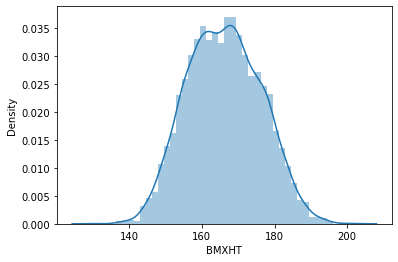

In [22]:
bmxht_df = da[da['BMXHT'].isna() == False]
sns.distplot(bmxht_df['BMXHT'])

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

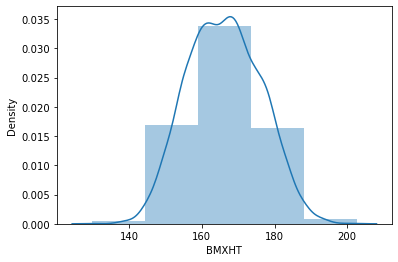

In [23]:
sns.distplot(bmxht_df['BMXHT'], bins = 5)

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

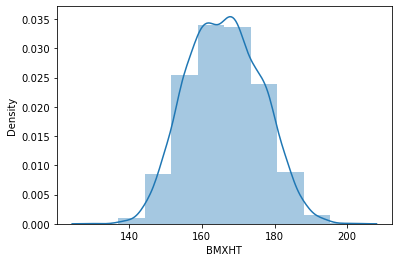

In [24]:
sns.distplot(bmxht_df['BMXHT'], bins = 10)

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

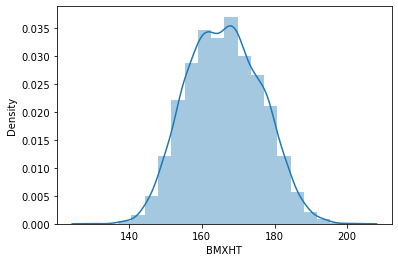

In [25]:
sns.distplot(bmxht_df['BMXHT'], bins = 20)

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

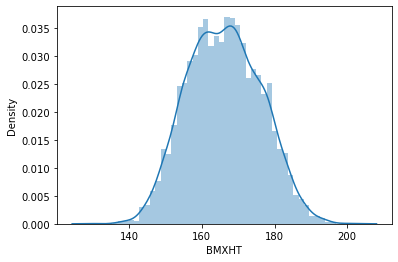

In [26]:
sns.distplot(bmxht_df['BMXHT'], bins = 50)

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMXHT', ylabel='Density'>

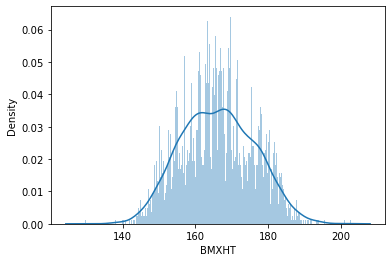

In [27]:
sns.distplot(bmxht_df['BMXHT'], bins = 500)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

The default value of bins gives a meaningful result because when we put kde=True, we get a fair idea of why the distribution has a slight dip at the top and how it goes down on either sides. When the number of bins increases, the distribution initially seems to make more sense but at excessively high number of bins, it makes no sense at all. Same goes for excessively low number of bins, it does not give enough information on why the distribution is shaped the way it is as it appears it should be uniformly distributed with very few bins.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

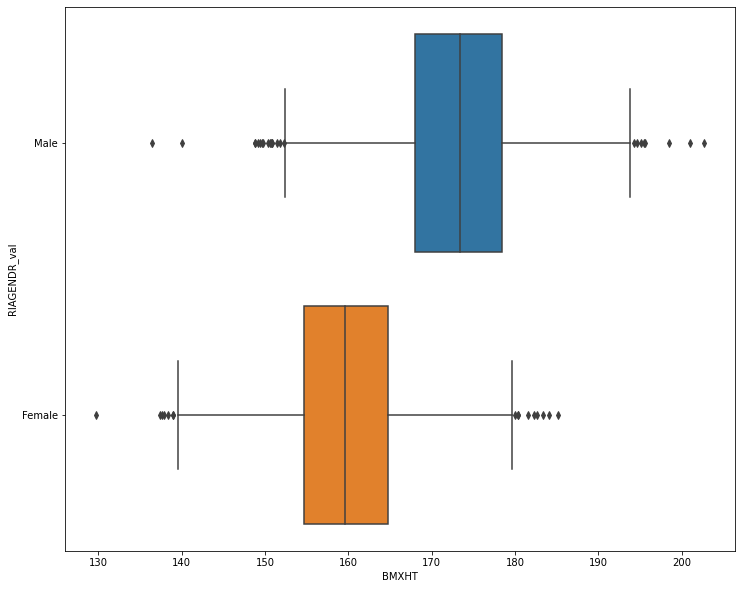

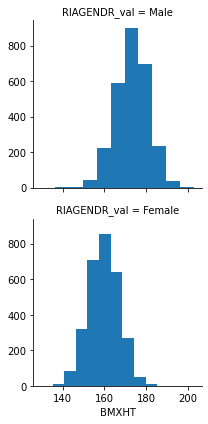

In [28]:
plt.figure(figsize=(12,10))
sns.boxplot(x = da['BMXHT'], y=da['RIAGENDR_val'])

g = sns.FacetGrid(da, row = 'RIAGENDR_val')
g = g.map(plt.hist, 'BMXHT')
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

In the boxplots, a lot of the outliers are stuck together which makes it difficult to see how many of them are there. Histograms help is noticing these outliers that have a larger count.

The outliers that are not stuck together are easier to see in the boxplots than on the histograms as even though the hist has outliers, their small numbers gives them no height in the graph and it is easy to misinterpret this as not having any outliers.

Both histograms and boxplots together give great analysis. Using one over the other would be bad as each has its own advantages.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

In [29]:
da['BPXSY1'].isna().sum()

334

In [30]:
bpsy = pd.DataFrame()
bpsy = da[da['BPXSY1'].isna() == False]

In [31]:
bpsy.dropna(inplace = True)
bpsy.isna().sum().sum()

C:\Users\RDTL\AppData\Local\Temp\ipykernel_25096\3488572297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpsy.dropna(inplace = True)


0

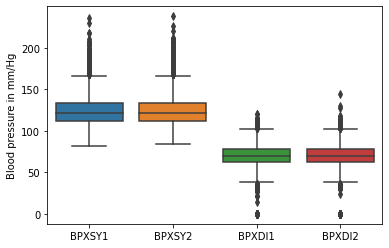

In [32]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

In [33]:
df = bpsy['BPXSY1'] > bpsy['BPXSY2']
df.value_counts()

False    139
True     120
dtype: int64

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [34]:
sy2_sy1 = df[df.iloc[0:] == False]
smaller_sy1 = sy2_sy1.value_counts()
smaller_sy1

False    139
dtype: int64

In [35]:
sy1_sy2 = df[df.iloc[0:] == True]
bigger_sy1 = sy1_sy2.value_counts()
bigger_sy1

True    120
dtype: int64

In [36]:
120/(120+139)

0.46332046332046334

Thus, 46% of people have a lower SBP on the second trail than the first one.

In [37]:
bpsy['BPXSY1'].mean()

124.85714285714286

In [38]:
bpsy['BPXSY2'].mean()

124.29343629343629

In [39]:
bpsy['BPXSY1'].max()

204.0

In [40]:
bpsy['BPXSY2'].max()

206.0

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BPXSY1', ylabel='Density'>

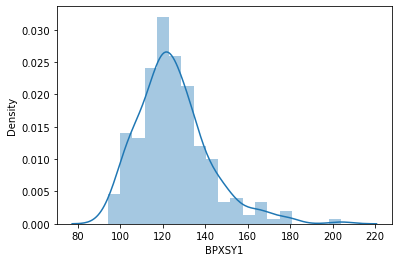

In [41]:
sns.distplot(bpsy['BPXSY1'])

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BPXSY2', ylabel='Density'>

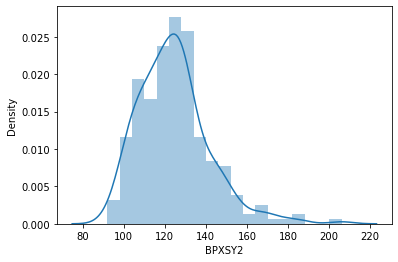

In [42]:
sns.distplot(bpsy['BPXSY2'])

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

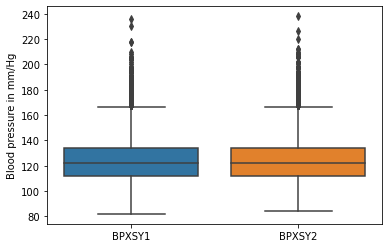

In [43]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

We see that the second systolic blood pressure the median is towards the left but it is right skewed. So, more people have a lower value of the systolic blood pressure on the second test and the extremes aer a little lowers than the first one.

The within-subject difference between the first and the second systolic blood pressure measurements are interesting. We see that 46% of people have a lower value of Systolic blood pressure on the second test. We also notice that the mean of both the distributions are the same, however, the second systolic test has a lower minimum of 92 and a higher maximum of 206 while the first systolic has a highter minimum of 94 and a lower maximum of 204

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [44]:
no_null_df = da.dropna()
no_null_df.isna().sum().sum()

0

In [45]:
no_null_df['DMDEDUC2'].value_counts()

4.0    91
5.0    85
3.0    49
2.0    18
1.0    16
Name: DMDEDUC2, dtype: int64

In [46]:
no_null_df["DMDEDUC2_val"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
no_null_df.DMDEDUC2_val.value_counts()

C:\Users\RDTL\AppData\Local\Temp\ipykernel_25096\59860075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_df["DMDEDUC2_val"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College",


Some college/AA    91
College            85
HS/GED             49
9-11               18
<9                 16
Name: DMDEDUC2_val, dtype: int64

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DMDEDUC2'>

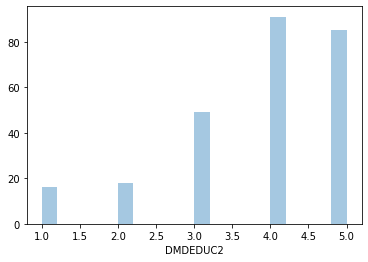

In [47]:
sns.distplot(no_null_df['DMDEDUC2'], kde = False, bins = 20)

In [48]:
no_null_df['DMDHHSIZ'].value_counts()

2    73
4    49
3    49
1    40
5    21
6    14
7    13
Name: DMDHHSIZ, dtype: int64

c:\Users\RDTL\anaconda3\envs\ds_off_py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DMDHHSIZ'>

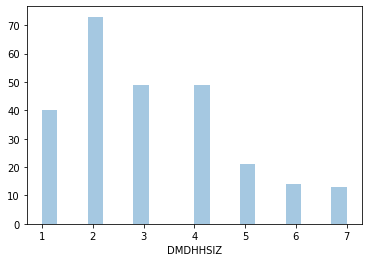

In [49]:
sns.distplot(no_null_df['DMDHHSIZ'], kde = False, bins = 20)

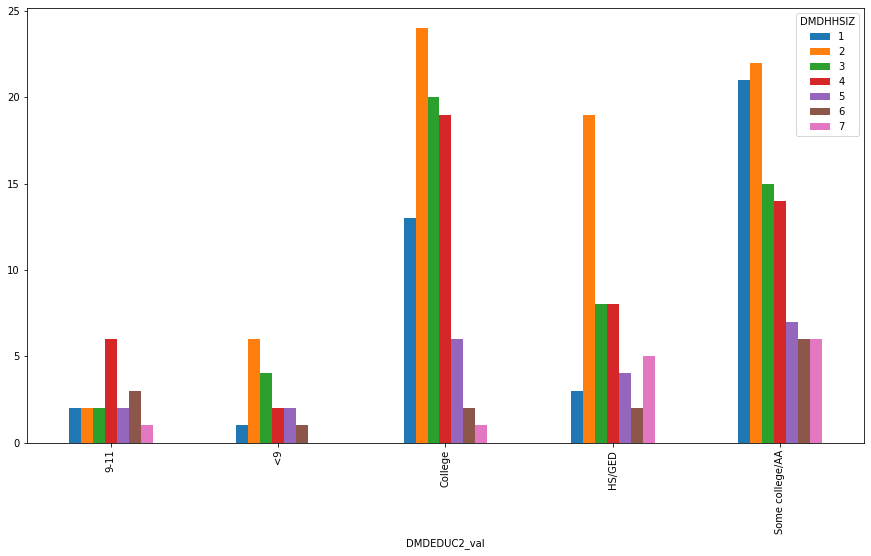

In [50]:
no_null_df.groupby(['DMDEDUC2_val', 'DMDHHSIZ']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

__Q5a.__ Comment on any major differences among the distributions.

We see that at the education level of 9-11, the household size is usually 4 implying they might be living with their parents. At the <9 level, it is majorly 2 or 3 people in the household, and the distribution is skerwed to the right (more people in the household). For all the other education levels, we see that the dist is unimodal with 2 members and right skewed. The ones with single person households are probably the people who never got married and the one's with 3 members may be people who live with their parents and havent been married or couples with only 1 child or so on.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

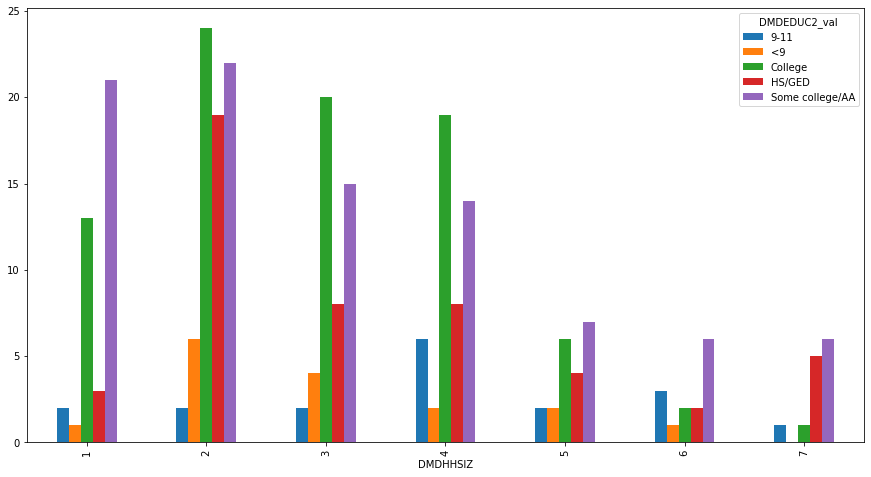

In [51]:
age_30_40_df = no_null_df.copy()
age_30_40_df["agegrp"] = pd.cut(no_null_df.RIDAGEYR, [30, 40])
age_30_40_df.groupby(['DMDHHSIZ', 'DMDEDUC2_val']).size().unstack(fill_value=0).plot.bar(figsize = (15,8))
plt.show()

In [52]:
age_30_40_df['DMDHHSIZ'].median()

3.0

Therefore, the median of the household size of people aged 30-40 is 3.

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [53]:
(
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .mean()
    )
    
).unstack()


RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDR                  1          2           1           2          1   
SDMVSTRA SDMVPSU                                                            
119      1        47.861111  47.663265  172.741667  159.570408  26.958333   
         2        54.363636  52.987952  172.906818  159.244578  27.160465   
120      1        43.130000  43.636364  169.537755  155.402041  30.939175   
         2        45.219178  43.736111  173.075342  159.218056  27.727397   
121      1        46.750000  44.397959  172.177885  158.871579  29.416505   
         2        42.063158  44.376344  174.764516  160.229032  26.273118   
122      1        44.653061  42.897436  173.998969  161.315385  28.528866   
         2        44.320000  47.333333  170.332323  157.231111  25.744444   
123      1        47.829787  44.841121  174.315217  162.059615  29.231522   
         2        52.126582  46.457447  174.454430  160.476596  28.811392   
124      1        50.750000  51.664000  172.109009  158.788710  28.614414   
         2        48.245614  42.541667  174.291228  162.853521  27.714035   
125      1        55.165289  50.900901  173.631092  160.762385  29.727731   
         2        49.705882  51.660000  174.456863  160.021429  29.143564   
126      1        48.416667  46.229167  175.149398  160.387500  29.033333   
         2        48.666667  47.205882  174.713043  160.892000  29.039130   
127      1        53.137931  49.694444  171.545349  157.422430  31.062353   
         2        54.070588  51.486239  173.366667  159.022936  30.557831   
128      1        53.673267  55.638462  169.325000  156.339063  31.749000   
         2        45.822785  45.589744  172.400000  160.437179  26.835443   
129      1        43.922222  45.329787  171.094318  156.900000  26.493182   
         2        45.775510  43.500000  173.138298  161.034259  28.961702   
130      1        50.516854  47.810526  176.974157  161.977895  30.337079   
         2        50.535354  50.833333  175.061224  160.060577  29.237755   
131      1        53.140187  54.893617  175.610476  161.989362  28.259615   
         2        46.778846  45.000000  175.091346  161.673810  30.077885   
132      1        42.380435  43.210526  172.534066  161.508421  28.546154   
         2        49.038760  51.700000  172.809524  159.138281  28.966667   
133      1        44.054795  45.105882  171.509722  158.295122  27.495833   
         2        47.489796  47.063158  171.179167  158.627368  27.966667   

                             
RIAGENDR                  2  
SDMVSTRA SDMVPSU             
119      1        30.052041  
         2        27.849398  
120      1        32.419388  
         2        27.400000  
121      1        30.856842  
         2        26.470968  
122      1        29.447436  
         2        26.611111  
123      1        29.905769  
         2        30.641489  
124      1        29.533065  
         2        28.640845  
125      1        30.385321  
         2        28.564286  
126      1        31.262500  
         2        29.612121  
127      1        32.189720  
         2        30.770642  
128      1        32.303125  
         2        27.491026  
129      1        29.019149  
         2        29.429630  
130      1        30.700000  
         2        31.490385  
131      1        30.061702  
         2        32.984127  
132      1        29.848421  
         2        30.540625  
133      1        27.959259  
         2        29.000000

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

In [54]:
(
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .max()
    )
    /
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .min()
    )
).unstack()

RIDAGEYR               BMXHT              BMXBMI          
RIAGENDR                 1         2         1         2         1         2
SDMVSTRA SDMVPSU                                                            
119      1        4.444444  4.444444  1.231270  1.221838  2.994413  3.256684
         2        4.000000  4.444444  1.269385  1.267041  2.224390  4.045161
120      1        4.444444  4.444444  1.297715  1.254360  3.042105  3.666667
         2        4.444444  4.444444  1.271065  1.296011  2.875000  2.443182
121      1        4.444444  4.444444  1.252324  1.308458  3.104938  2.538462
         2        4.444444  4.444444  1.296036  1.249319  2.542373  3.349112
122      1        4.444444  4.444444  1.244646  1.232877  3.284916  3.066298
         2        4.444444  4.444444  1.272849  1.214035  1.902703  2.730539
123      1        4.444444  4.444444  1.210127  1.262143  3.039548  2.483333
         2        4.210526  4.444444  1.290116  1.237474  3.275000  2.947917
124      1        4.210526  4.444444  1.214700  1.259393  2.212871  3.656627
         2        4.210526  4.444444  1.204545  1.216480  2.436464  3.530387
125      1        4.444444  4.444444  1.266364  1.230070  3.271605  2.948571
         2        4.444444  4.444444  1.229072  1.248281  2.420765  3.437126
126      1        4.210526  4.210526  1.224347  1.223684  2.769231  3.395210
         2        4.444444  4.444444  1.244715  1.217753  2.355670  3.226994
127      1        4.444444  4.444444  1.219481  1.226573  3.220930  3.195531
         2        4.444444  4.444444  1.223082  1.267626  2.704142  3.184971
128      1        4.444444  4.000000  1.359029  1.277698  2.577114  3.160428
         2        4.444444  4.444444  1.271883  1.223135  2.734940  3.434483
129      1        4.444444  4.444444  1.209941  1.350810  2.124324  2.806630
         2        4.444444  4.444444  1.250484  1.245775  3.039326  3.413408
130      1        4.444444  4.444444  1.224691  1.227972  3.457831  3.261538
         2        4.444444  4.000000  1.255995  1.288210  2.994475  3.875862
131      1        4.210526  4.444444  1.203232  1.220938  3.357616  3.444444
         2        4.444444  4.444444  1.204759  1.203528  2.713568  3.822485
132      1        4.111111  4.210526  1.268568  1.198903  2.432161  3.121212
         2        4.444444  4.444444  1.292895  1.275562  3.512195  4.078788
133      1        4.444444  4.444444  1.265293  1.273934  2.502762  2.969512
         2        4.444444  4.444444  1.372161  1.202364  3.222222  3.706897

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [55]:
(
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .quantile(0.75)
    )
    -
    (
        da.groupby(['SDMVSTRA', 'SDMVPSU', 'RIAGENDR'])
        [['RIDAGEYR', 'BMXHT', 'BMXBMI']]
        .quantile(0.25)
    )
).unstack()

RIDAGEYR          BMXHT         BMXBMI        
RIAGENDR                1      2       1       2      1       2
SDMVSTRA SDMVPSU                                               
119      1          29.75  31.25   9.000   9.325  5.350   9.750
         2          29.00  33.50  11.225   9.950  5.300   9.350
120      1          23.75  26.50  12.125   8.750  9.400   8.775
         2          26.00  25.75  10.500  10.550  7.100   7.750
121      1          34.50  26.25  10.725   9.150  7.500   9.000
         2          25.50  26.00   8.600   9.600  5.700   8.100
122      1          29.50  24.00   9.400  10.400  7.700   9.875
         2          30.00  25.00  10.150   7.575  4.100   8.475
123      1          28.25  30.50   9.350   9.675  8.050  10.450
         2          31.50  34.50   9.900  11.200  8.100   9.975
124      1          32.00  27.00   9.800   8.375  6.100   8.950
         2          31.00  23.50  11.600   8.650  8.700   9.000
125      1          29.00  31.00  10.350   9.100  8.300   8.000
         2          33.50  32.25   7.925  10.675  7.900  10.325
126      1          36.25  30.25  10.450   8.500  8.000  10.675
         2          34.00  31.75   8.125  12.025  6.850  10.350
127      1          30.00  27.25   9.025   7.700  8.200  11.750
         2          28.00  30.00  10.750  11.600  5.950   9.200
128      1          33.00  28.00   9.950   9.125  6.675   8.500
         2          25.50  22.00   9.850  10.650  5.800   9.375
129      1          20.75  24.75  12.300  10.375  6.025   9.500
         2          30.75  26.25  10.700   8.900  5.800   9.725
130      1          36.00  35.50   9.900   8.650  6.700  11.200
         2          28.50  30.25   8.625  10.225  8.375   8.050
131      1          36.00  35.75  10.500  10.025  7.525  11.075
         2          28.00  24.00   7.750   7.575  7.850  10.625
132      1          21.25  30.00  10.600  10.950  6.600  10.700
         2          38.00  33.00  10.550  10.100  9.600  11.750
133      1          33.00  34.00   8.925  10.300  6.425   8.300
         2          32.25  28.50   8.850   9.550  5.900   9.650

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.